## Callin Switzer
## Create figure 3 for poster (Moth trajectory actual vs. predicted)

In [40]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
sns.set(style="ticks")
import scipy.io
import subprocess
import csv

import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

#%qtconsole

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\savedModels'
randomRawData = r'D:/Dropbox/AcademiaDropbox/mothMachineLearning_dataAndFigs/PythonGeneratedData'

if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)
if not os.path.exists(savedModels):
    os.mkdir(savedModels)


TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2019-01-02 14:20:28.562722


In [41]:
# import custom Utils functions
from DeepLearningUtils import *

In [42]:
pathDF = pd.read_csv((os.path.join(dataOutput, "PathGraphic.csv")))
pd.set_option('display.max_columns', 500)
pathDF.head()

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,tau_pred,x_99,y_99,phi_99,theta_99,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred,Fx_pred,Fy_pred,quadrant,tsteps,x_99_actual,xd_99_actual,y_99_actual,yd_99_actual,theta_99_actual,thetad_99_actual,phi_99_actual,phid_99_actual
0,0.0,0.0,3.926991,0.785398,0.000001,125.663706,0.000000,0.000000,1432.744547,1.119976,-321.818451,0.0,2.486899,3.926991,0.785398,-22.135920,173.082687,-0.189894,-0.275100,624.252136,1289.599243,1,0.00,-0.087800,-8.993559,2.544456,131.379402,0.789095,0.398616,3.931326,0.431273
1,0.0,0.0,3.926991,0.785398,-22.135920,173.082687,-0.189894,-0.275100,1054.857548,1.218496,-350.956696,0.0,2.330638,3.926991,0.785398,-22.208017,160.787750,-0.190977,-0.273578,363.986359,990.069885,1,0.02,-0.519776,-30.487068,3.408714,171.282291,0.784066,0.103439,3.926296,0.135862
2,0.0,0.0,3.926991,0.785398,-22.208017,160.787750,-0.190977,-0.273578,720.155435,1.404157,-392.329529,0.0,2.027934,3.926991,0.785398,-22.322237,140.949417,-0.189717,-0.270872,119.451866,710.179626,1,0.04,-0.516659,-30.075499,3.096941,152.060892,0.783134,0.009487,3.925383,0.042880
3,0.0,0.0,3.926991,0.785398,-22.322237,140.949417,-0.189717,-0.270872,476.758957,1.769239,-443.292358,0.0,1.597808,3.926991,0.785398,-22.474615,114.808495,-0.186243,-0.267093,-93.989716,467.402435,2,0.06,-0.515111,-29.781225,2.644737,126.195733,0.782326,-0.073133,3.924614,-0.037803
4,0.0,0.0,3.926991,0.785398,-22.474615,114.808495,-0.186243,-0.267093,381.768676,2.330324,-500.684509,0.0,1.067286,3.926991,0.785398,-22.657322,84.003555,-0.180822,-0.262525,-262.877808,276.843964,2,0.08,-0.515134,-29.602938,2.080342,95.299626,0.781698,-0.138843,3.924040,-0.100745


In [43]:
pathDF2 = pd.read_csv((os.path.join(dataOutput, "PathGraphic_feed.csv")))

In [44]:
pathDF2.head()

,x_0,y_0,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,F_pred,alpha_pred,tau_pred,x_99,y_99,phi_99,theta_99,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred,Fx_pred,Fy_pred,quadrant,tsteps,x_99_actual,xd_99_actual,y_99_actual,yd_99_actual,theta_99_actual,thetad_99_actual,phi_99_actual,phid_99_actual
0,0.0,0.0,3.926991,0.785398,0.000001,125.663706,0,0,1432.744547,1.119976,-321.818451,0,2.486899,3.926991,0.785398,-22.135920,173.082687,-0.189894,-0.275100,624.252136,1289.599243,1,0.00,-0.087800,-8.993559,2.544456,131.379402,0.789095,0.398616,3.931326,0.431273
1,0.0,0.0,3.926991,0.785398,0.000001,121.715750,0,0,1054.857548,1.218496,-350.956696,0,2.330638,3.926991,0.785398,-22.208017,160.787750,-0.190977,-0.273578,363.986359,990.069885,1,0.02,-0.082601,-8.437637,2.393166,120.024120,0.788153,0.302559,3.930382,0.335130
2,0.0,0.0,3.926991,0.785398,0.000001,110.119945,0,0,720.155435,1.404157,-392.329529,0,2.027934,3.926991,0.785398,-22.322237,140.949417,-0.189717,-0.270872,119.451866,710.179626,1,0.04,-0.077934,-7.937957,2.095135,101.492596,0.787241,0.210368,3.929489,0.243891
3,0.0,0.0,3.926991,0.785398,0.000001,91.604899,0,0,476.758957,1.769239,-443.292358,0,1.597808,3.926991,0.785398,-22.474615,114.808495,-0.186243,-0.267093,-93.989716,467.402435,2,0.06,-0.074020,-7.515376,1.669001,76.937882,0.786420,0.128126,3.928706,0.163564
4,0.0,0.0,3.926991,0.785398,0.000001,67.333981,0,0,381.768676,2.330324,-500.684509,0,1.067286,3.926991,0.785398,-22.657322,84.003555,-0.180822,-0.262525,-262.877808,276.843964,2,0.08,-0.070948,-7.173721,1.141480,47.896552,0.785745,0.061338,3.928086,0.099517


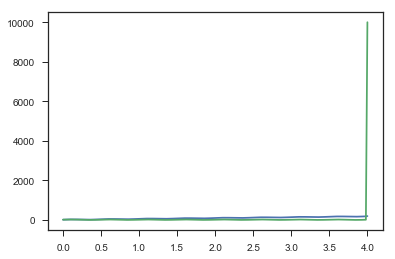

In [45]:
plt.plot(pathDF.tsteps, np.cumsum(pathDF.y_99_actual), label = "simulation (actual)")
plt.plot(pathDF.tsteps,np.cumsum(pathDF.y_99), label = "Nnet prediction")

In [46]:
# add timestep
pathDF["timestep"] = pathDF.tsteps

In [47]:
pathDF = pathDF.iloc[1:25, :]
pathDF2 = pathDF2.iloc[1:25, :]

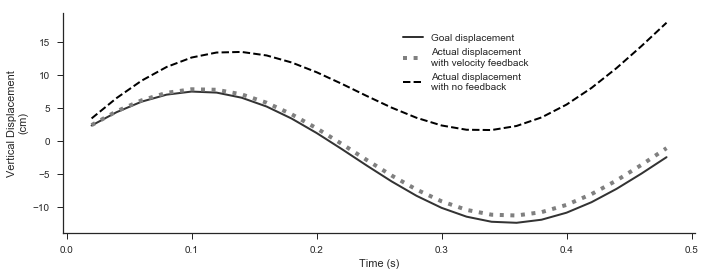

In [59]:
f, (ax ) = plt.subplots(1, 1, sharey=False, figsize=np.array([20,8]) / 2)



ax.plot(pathDF.timestep, np.cumsum(pathDF.y_99), c= '0.2', linewidth = 2, linestyle = "-", marker = ".", markersize = 0, label = 'Goal displacement')
ax.plot(pathDF.timestep, np.cumsum(pathDF2.y_99_actual), '0.5', linestyle = ":",linewidth = 4, marker = '.', markersize = 0, label = "Actual displacement\nwith velocity feedback")
ax.plot(pathDF.timestep, np.cumsum(pathDF.y_99_actual), c= "black", linestyle = "--",linewidth = 2, marker = '.', markersize = 0, label = "Actual displacement\nwith no feedback")

ax.set_ylabel("Vertical Displacement\n(cm)")
ax.set_xlabel("Time (s)")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
plt.legend(bbox_to_anchor=(0.75, 0.6))

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
f.tight_layout()


plt.show()

f.savefig(os.path.join(figDir, "PartialTrajectory2.svg"))


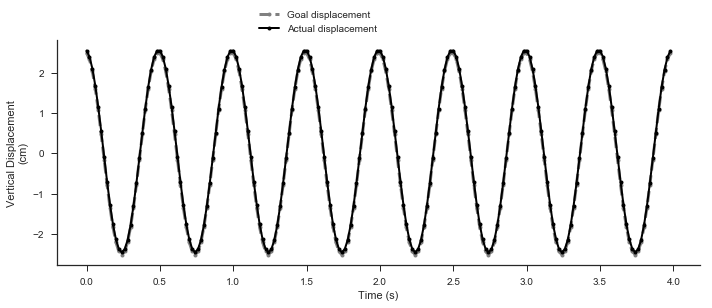

In [7]:
f, (ax ) = plt.subplots(1, 1, sharey=False, figsize=np.array([20,8]) / 2)



ax.plot(pathDF.timestep,pathDF.y_99, c= "grey", linewidth = 3, linestyle = "--", marker = "o", markersize = 4, label = 'Goal displacement')
ax.plot(pathDF.timestep, pathDF.y_99_actual, c= "black", linewidth = 2, marker = 'o', markersize = 4, label = "Actual displacement")
ax.set_ylabel("Vertical Displacement\n(cm)")
ax.set_xlabel("Time (s)")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
plt.legend(bbox_to_anchor=(0.3, 0.99))

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
f.tight_layout()


plt.show()